In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as NullFormatter
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import warnings


warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings.csv


In [ ]:
#Load the dataset.
dff = pd.read_csv('hotel_bookings.csv')

In [ ]:
#Take a sample from the dataset.
df=dff.sample(n=1100, random_state=42)

In [ ]:
print(df.head())

               hotel  is_canceled  lead_time  arrival_date_year  \
30946   Resort Hotel            0        203               2016   
40207     City Hotel            1         82               2015   
103708    City Hotel            0         25               2016   
85144     City Hotel            0          1               2016   
109991    City Hotel            0         70               2017   

       arrival_date_month  arrival_date_week_number  \
30946            December                        49   
40207                July                        29   
103708           December                        53   
85144               March                        11   
109991              April                        16   

        arrival_date_day_of_month  stays_in_weekend_nights  \
30946                           2                        2   
40207                          16                        0   
103708                         27                        0   
85144             

In [ ]:
print(df.shape)

(1100, 32)


In [ ]:
irrelevant_columns = [
    'hotel', 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
    'reservation_status', 'reservation_status_date', 'customer_type', 'deposit_type', 'meal' , 'adults', 'children','babies','company', 'agent'
]
df = df.drop(columns=irrelevant_columns)

In [ ]:
print(df.shape)

(1100, 18)


In [ ]:
# Information about the dataset, including data types and missing values.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 1100 entries, 30946 to 90225
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     1100 non-null   int64  
 1   lead_time                       1100 non-null   int64  
 2   arrival_date_week_number        1100 non-null   int64  
 3   stays_in_weekend_nights         1100 non-null   int64  
 4   stays_in_week_nights            1100 non-null   int64  
 5   country                         1095 non-null   object 
 6   market_segment                  1100 non-null   object 
 7   distribution_channel            1100 non-null   object 
 8   is_repeated_guest               1100 non-null   int64  
 9   previous_cancellations          1100 non-null   int64  
 10  previous_bookings_not_canceled  1100 non-null   int64  
 11  reserved_room_type              1100 non-null   object 
 12  assigned_room_type              11

In [ ]:
# Basic statistics for numerical columns.
print(df.describe())

       is_canceled    lead_time  arrival_date_week_number  \
count  1100.000000  1100.000000               1100.000000   
mean      0.380909   103.714545                 27.278182   
std       0.485831   104.678695                 13.531511   
min       0.000000     0.000000                  1.000000   
25%       0.000000    19.000000                 16.000000   
50%       0.000000    71.000000                 28.000000   
75%       1.000000   161.250000                 39.000000   
max       1.000000   594.000000                 53.000000   

       stays_in_weekend_nights  stays_in_week_nights  is_repeated_guest  \
count              1100.000000           1100.000000        1100.000000   
mean                  0.892727              2.461818           0.029091   
std                   0.978077              1.785952           0.168138   
min                   0.000000              0.000000           0.000000   
25%                   0.000000              1.000000           0.000000   


In [ ]:
# Check for missing values.
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 is_canceled                       0
lead_time                         0
arrival_date_week_number          0
stays_in_weekend_nights           0
stays_in_week_nights              0
country                           5
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
dtype: int64


In [ ]:
# Check for duplicate rows.
duplicate_rows = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicate_rows)


Number of duplicate rows: 31


In [ ]:
# Check for inconsistent data types.
inconsistent_types = df.dtypes
print("\nData types:\n", inconsistent_types)


Data types:
 is_canceled                         int64
lead_time                           int64
arrival_date_week_number            int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
days_in_waiting_list                int64
adr                               float64
required_car_parking_spaces         int64
total_of_special_requests           int64
dtype: object


In [ ]:
# ‘lead_time’ is not in the correct datetime format.
df['lead_time'] = pd.to_datetime(df['lead_time'])
df.head()

,is_canceled,lead_time,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
30946,0,1970-01-01 00:00:00.000000203,49,2,5,GBR,Direct,Direct,0,0,0,F,F,4,0,66.8,0,0
40207,1,1970-01-01 00:00:00.000000082,29,0,3,PRT,Online TA,TA/TO,0,0,0,A,A,0,0,76.5,0,0
103708,0,1970-01-01 00:00:00.000000025,53,0,3,BRA,Offline TA/TO,TA/TO,0,0,0,A,K,2,0,60.0,0,1
85144,0,1970-01-01 00:00:00.000000001,11,0,1,SWE,Online TA,TA/TO,0,0,0,A,A,0,0,95.0,0,0
109991,0,1970-01-01 00:00:00.000000070,16,2,2,GBR,Online TA,TA/TO,0,0,0,A,A,0,0,108.0,0,0


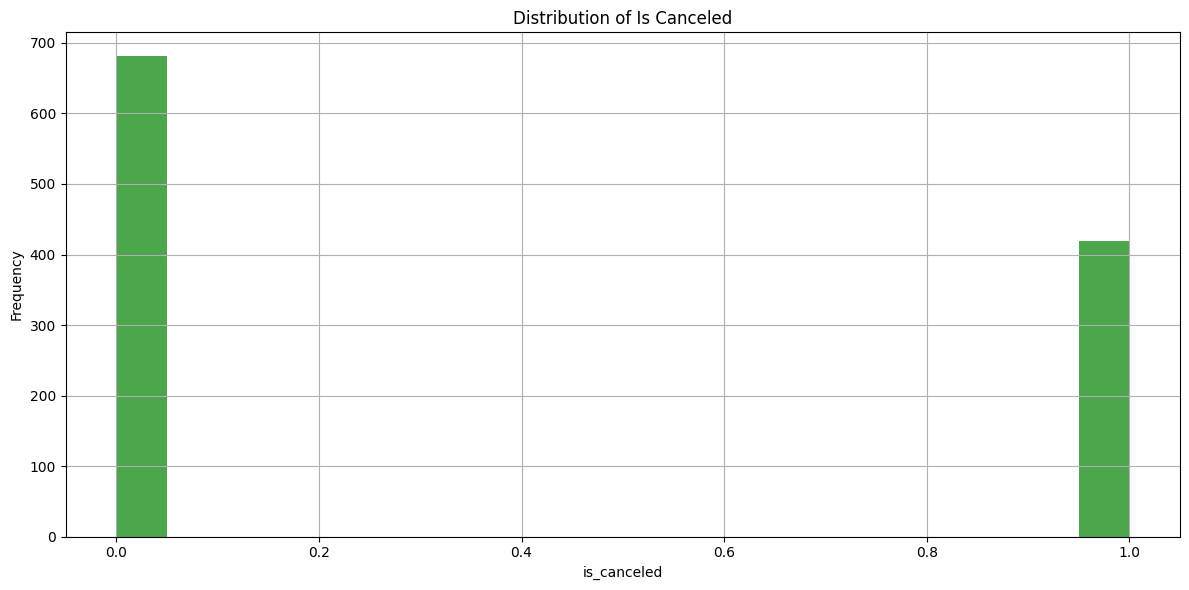

In [ ]:
# Plot some graphs to get better understanding of data.
plt.figure(figsize=(12, 6))
plt.hist(df['is_canceled'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Is Canceled')
plt.xlabel('is_canceled')
plt.ylabel('Frequency')
plt.grid()
plt.tight_layout()
plt.show()

In [ ]:
# Select only numeric columns.
numeric_data = df.select_dtypes(include=['number'])

In [ ]:
# Calculate correlation matrix.
correlation_matrix = numeric_data.corr()

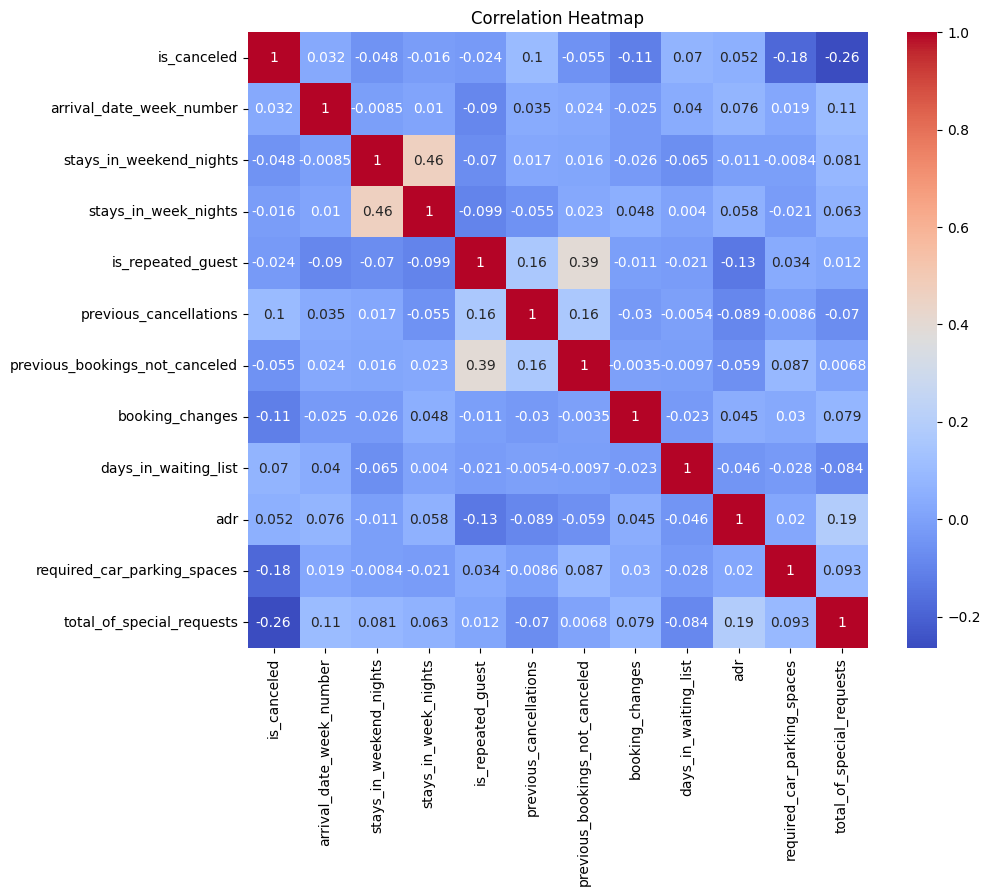

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Frequency (proportion) of each country within each is_canceled group in the DataFrame.
proportions = df.groupby(['is_canceled'])['country'].value_counts(normalize=True)

proportions_df = proportions.reset_index(name='Proportion')
print(proportions_df)

    is_canceled country  Proportion
0             0     PRT    0.264402
1             0     GBR    0.134417
2             0     ESP    0.106352
3             0     DEU    0.103397
4             0     FRA    0.097489
..          ...     ...         ...
71            1     QAT    0.002392
72            1     ROU    0.002392
73            1     SVN    0.002392
74            1     SWE    0.002392
75            1     TUR    0.002392

[76 rows x 3 columns]


In [ ]:
print(df.columns)

Index(['is_canceled', 'lead_time', 'arrival_date_week_number',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'country',
       'market_segment', 'distribution_channel', 'is_repeated_guest',
       'previous_cancellations', 'previous_bookings_not_canceled',
       'reserved_room_type', 'assigned_room_type', 'booking_changes',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object')


In [ ]:
# Feature Extraction.
Feature = df[['required_car_parking_spaces', 'is_canceled', 'lead_time',
               'arrival_date_week_number', 'stays_in_weekend_nights',
               'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
               'previous_bookings_not_canceled', 'reserved_room_type', 'market_segment', 'adr']]
Feature = pd.concat([Feature,pd.get_dummies(df['is_repeated_guest'])], axis=1)
Feature.drop(['is_canceled'], axis = 1,inplace=True)
Feature.head()
X = Feature # 8 attributes
# Labels corresponding to each row from our feature set.
X[0:5]
y = df['is_canceled'].values
y[0:5]


array([0, 1, 0, 0, 0])

In [ ]:
# Normalization.
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns
X_scaled = preprocessing.StandardScaler().fit_transform(X[numeric_cols])
X_scaled[0:5]

array([[-0.23160278,  1.60600675,  1.13260631, -0.17309693, -0.11668814,
        -0.08126809, -0.75032809],
       [-0.23160278,  0.12730295, -0.91315221, -0.17309693, -0.11668814,
        -0.08126809, -0.54077166],
       [-0.23160278,  1.90174751, -0.91315221, -0.17309693, -0.11668814,
        -0.08126809, -0.89723363],
       [-0.23160278, -1.20353046, -0.91315221, -0.17309693, -0.11668814,
        -0.08126809, -0.14110218],
       [-0.23160278, -0.83385451,  1.13260631, -0.17309693, -0.11668814,
        -0.08126809,  0.13974664]])

In [ ]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (880, 13) (880,)
Test set: (220, 13) (220,)


# **classifiers**

**Scaling features for logistic regression and SVM:**

In [ ]:
# Select only numeric columns for scaling
X_train_numeric = X_train.select_dtypes(include=['number'])
X_test_numeric = X_test.select_dtypes(include=['number'])

# Scaling features for SVM and Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_numeric)
X_test_scaled = scaler.transform(X_test_numeric)


**Logistic** **Regression**

In [ ]:
# Model 1: Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
log_reg_pred = log_reg.predict(X_test_scaled)


**Random Forest**

In [ ]:
# Model 2: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_numeric, y_train)
rf_pred = rf.predict(X_test_numeric)

**SVM**

In [ ]:
# Model 3: Support Vector Machine (SVM)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_scaled, y_train)
svm_pred = svm.predict(X_test_scaled)



# **Evaluating models**

In [ ]:
# Function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    #confusion matric
    print(classification_report(y_true, y_pred))

In [ ]:
# Evaluate each model
evaluate_model(y_test, log_reg_pred, "Logistic Regression")
evaluate_model(y_test, rf_pred, "Random Forest")
evaluate_model(y_test, svm_pred, "Support Vector Machine")


Logistic Regression Performance:
Accuracy: 0.70
Precision: 0.88
Recall: 0.19
F1 Score: 0.32
              precision    recall  f1-score   support

           0       0.69      0.99      0.81       142
           1       0.88      0.19      0.32        78

    accuracy                           0.70       220
   macro avg       0.79      0.59      0.56       220
weighted avg       0.76      0.70      0.64       220


Random Forest Performance:
Accuracy: 0.67
Precision: 0.53
Recall: 0.54
F1 Score: 0.54
              precision    recall  f1-score   support

           0       0.74      0.74      0.74       142
           1       0.53      0.54      0.54        78

    accuracy                           0.67       220
   macro avg       0.64      0.64      0.64       220
weighted avg       0.67      0.67      0.67       220


Support Vector Machine Performance:
Accuracy: 0.70
Precision: 0.93
Recall: 0.17
F1 Score: 0.28
              precision    recall  f1-score   support

           0   

In [ ]:
# Create a DataFrame to store the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Support Vector Machine'],
    'Accuracy': [0.75, 0.67, 0.70],
    'Precision': [0.88, 0.93, 0.93],
    'Recall': [0.19, 0.54, 0.17],
    'F1-Score': [0.32, 0.54, 0.28]
})

# Print the results
print(results)

# Determine the best model based on F1-Score
best_model = results['Model'][results['F1-Score'].idxmax()]
print(f'The best model is: {best_model}')

                    Model  Accuracy  Precision  Recall  F1-Score
0     Logistic Regression      0.75       0.88    0.19      0.32
1           Random Forest      0.67       0.93    0.54      0.54
2  Support Vector Machine      0.70       0.93    0.17      0.28
The best model is: Random Forest


In [ ]:
# Assuming df is your preprocessed DataFrame
numeric_columns = df.select_dtypes(include=["int64", "float64"])

# Display the numeric columns DataFrame
print(numeric_columns.head())

        is_canceled  arrival_date_week_number  stays_in_weekend_nights  \
30946             0                        49                        2   
40207             1                        29                        0   
103708            0                        53                        0   
85144             0                        11                        0   
109991            0                        16                        2   

        stays_in_week_nights  is_repeated_guest  previous_cancellations  \
30946                      5                  0                       0   
40207                      3                  0                       0   
103708                     3                  0                       0   
85144                      1                  0                       0   
109991                     2                  0                       0   

        previous_bookings_not_canceled  booking_changes  days_in_waiting_list  \
30946                  

In [ ]:
# Calculate the overall cancellation rate
total_bookings = df.shape[0]
total_cancellations = df['is_canceled'].sum()
cancellation_rate = total_cancellations / total_bookings * 100

# Cancellation rate by market segment
cancellation_rate_by_segment = df.groupby('market_segment')['is_canceled'].mean() * 100

print(f'Overall Cancellation Rate: {cancellation_rate:.2f}%')
print('Cancellation Rate by Market Segment:')
print(cancellation_rate_by_segment)

Overall Cancellation Rate: 38.09%
Cancellation Rate by Market Segment:
market_segment
Aviation         25.000000
Complementary    16.666667
Corporate        26.086957
Direct           15.044248
Groups           66.161616
Offline TA/TO    33.936652
Online TA        35.546875
Name: is_canceled, dtype: float64


In [ ]:
# Summary statistics for key numerical features
summary_stats = df[['lead_time', 'adr',  'stays_in_weekend_nights', 'stays_in_week_nights']].describe()
print(summary_stats)

         lead_time          adr  stays_in_weekend_nights  stays_in_week_nights
count  1100.000000  1100.000000              1100.000000           1100.000000
mean    103.714545   101.531373                 0.892727              2.461818
std     104.678695    46.309303                 0.978077              1.785952
min       0.000000     0.000000                 0.000000              0.000000
25%      19.000000    70.000000                 0.000000              1.000000
50%      71.000000    95.000000                 1.000000              2.000000
75%     161.250000   123.497500                 2.000000              3.000000
max     594.000000   314.670000                 6.000000             15.000000


In [ ]:
# Count of cancellations vs. non-cancellations
cancellation_counts = df['is_canceled'].value_counts()
print("Count of Cancellations vs. Non-Cancellations:")
print(cancellation_counts)

Count of Cancellations vs. Non-Cancellations:
is_canceled
0    681
1    419
Name: count, dtype: int64


In [ ]:
# Total bookings by country
total_bookings_by_country = df['country'].value_counts()

# Display top 10 countries by bookings
print("Top 10 Countries by Total Bookings:")
print(total_bookings_by_country.head(10))

Top 10 Countries by Total Bookings:
country
PRT    457
GBR    113
ESP     87
FRA     85
DEU     79
ITA     31
IRL     29
USA     23
NLD     20
BEL     18
Name: count, dtype: int64


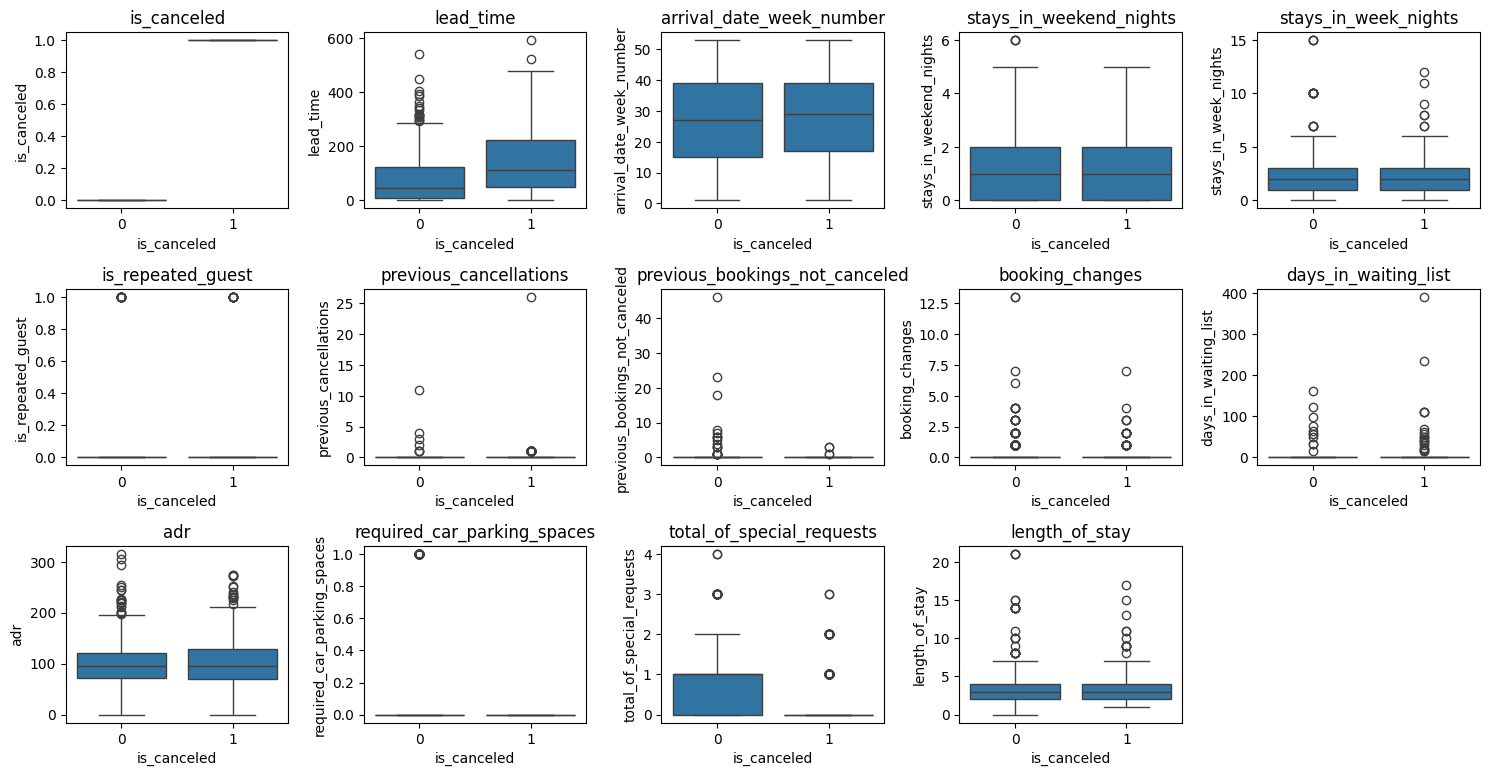

In [ ]:
# Boxplots for numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 5, i + 1)
    sns.boxplot(x='is_canceled', y=feature, data=df)
    plt.title(feature)
plt.tight_layout()
plt.show()

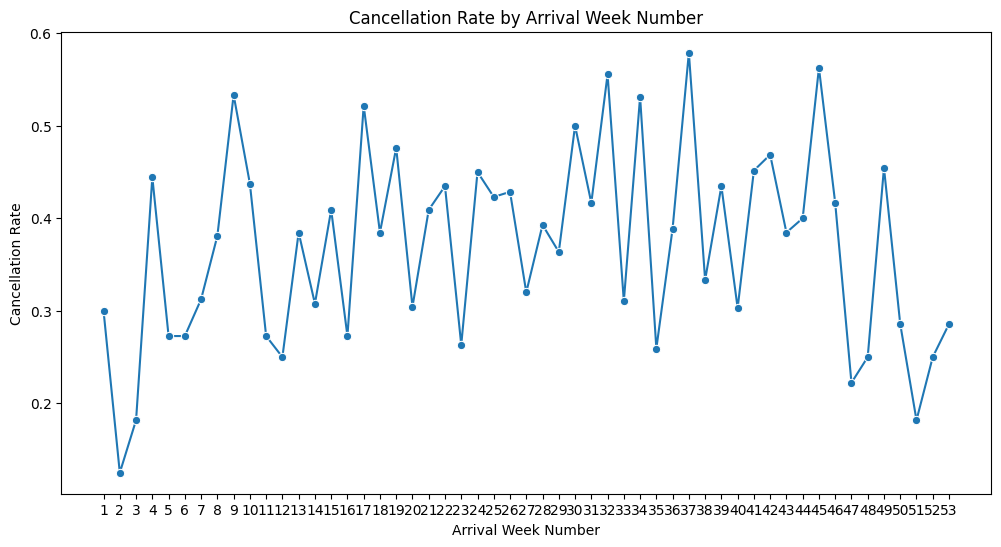

In [ ]:
# Cancellation rates by week number
week_cancellation_rate = df.groupby('arrival_date_week_number')['is_canceled'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=week_cancellation_rate, x='arrival_date_week_number', y='is_canceled', marker='o')
plt.title('Cancellation Rate by Arrival Week Number')
plt.xlabel('Arrival Week Number')
plt.ylabel('Cancellation Rate')
plt.xticks(range(1, 54))  # Weeks in a year
plt.show()

In [ ]:
# Creating a feature for total stay duration
df['total_stay'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

# Total stay statistics by cancellation status
total_stay_stats = df.groupby('is_canceled')['total_stay'].describe()
total_stay_stats


,count,mean,std,min,25%,50%,75%,max
is_canceled,,,,,,,,
0,681.0,3.414097,2.584235,0.0,2.0,3.0,4.0,21.0
1,419.0,3.257757,2.065994,1.0,2.0,3.0,4.0,17.0
